# COE782- ML - Lista2 - Parte prática - E4

## Estimação pdf

Vivian de Carvalho Rodrigues

DRE:125228569

In [1]:
#Referência
#https://stats.stackexchange.com/questions/70855/generating-random-variables-from-a-mixture-of-normal-distributions

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

%matplotlib inline

In [2]:
#definição parâmetros de gaussiana (mistura)
mu = [0.3, 0.8] 
sigma = [0.1, 0.09]
p_i = [0.2, 0.8]
x = np.arange(0., 1.,0.01)

#definição parâmetros do histograma
n = 50
delta = [0.04, 0.08, 0.25]
ruido = [-0.1, 0.09]


#função que monta mistura de Gaussianas (eq. 2.188) 
def univariate_normal(x, mean, variance):
    """pdf of the univariate normal distribution."""
    return ((1. / np.sqrt(2 * np.pi * variance)) * 
            np.exp(-(x - mean)**2 / (2 * variance)))

In [3]:
#Curva mistura de Gaussianas
y = p_i[0] * univariate_normal(x, mean=mu[0], variance=sigma[0]**2) + p_i[1] * univariate_normal(x, mean=mu[1], variance=sigma[1]**2)


# amostragem de dados com ruido para o histograma
hist = []
for i in range(n):
    z_i = np.argmax(np.random.multinomial(1, p_i))
    h_i = np.random.normal(mu[z_i], sigma[z_i]) + ruido[int(np.random.default_rng().integers(2, size=1))]
    hist.append(h_i)

Delta =  0.04


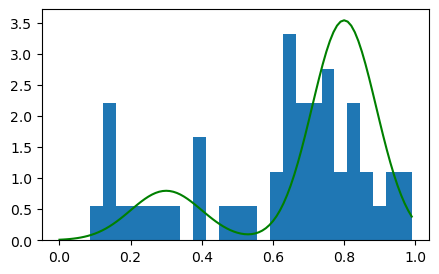

Delta =  0.08


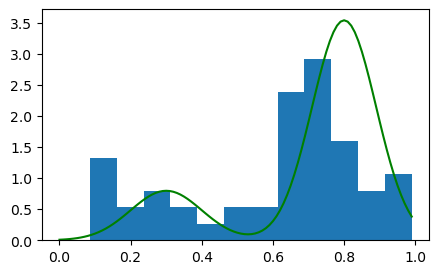

Delta =  0.25


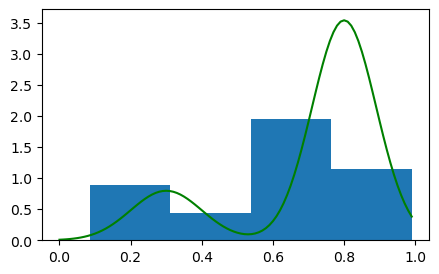

In [4]:
#plota resultados (figura 2.24 - Bishop)
for i in range (len(delta)):
    print('Delta = ', delta[i])
    fig, ax = plt.subplots(figsize=(5, 3))
    
    ax.hist(hist, bins=int(1/delta[i]), density=True)
    ax.plot(x, y, color='g',linestyle="-")
    plt.show()

h =  0.005


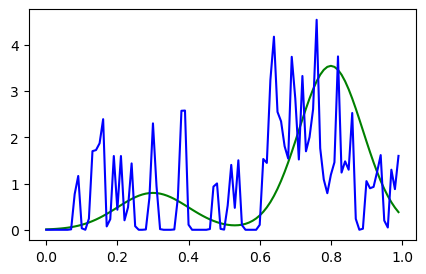

h =  0.07


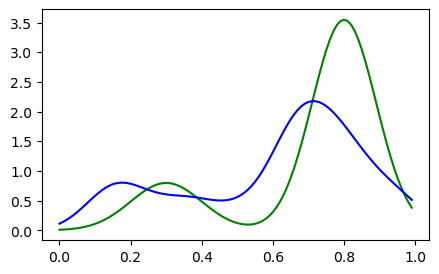

h =  0.2


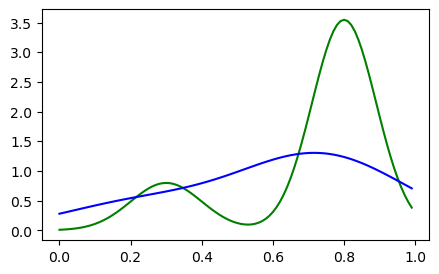

In [5]:
#Método Kernel
#https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html

#largura da banda
bandwidth = [0.005, 0.07, 0.2]

for i in range (len(bandwidth)):
    print('h = ', bandwidth[i])

    kde = KernelDensity(kernel="gaussian", bandwidth=bandwidth[i]).fit(np.array(hist).reshape(-1,1))
    log_dens = kde.score_samples(x.reshape(-1,1))

    #plota resultados (figura 2.25 - Bishop)
    fig, ax = plt.subplots(figsize=(5, 3))
    ax.plot(x, y, color='g',linestyle="-")    
    ax.plot(x.reshape(-1,1)[:, 0], np.exp(log_dens), color='blue',linestyle="-")
    plt.show()